**Importing the libraries**

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost as cbc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer

**Reading the data**

In [54]:
train_data = pd.read_csv("Train_Data.csv")
train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


**Converting specific ailments into category type**

In [55]:
train_data["Specific ailments"] = train_data["Specific ailments"].astype("category")

**Dropping the duplicate rows**

In [56]:
train_data.drop_duplicates(inplace=True)

**Encoding the Food Preference column**

In [57]:
arr = np.array(train_data['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

train_data = pd.concat([train_data,encoded_df],axis=1)

train_data.drop(columns=['Food preference'],axis =1 , inplace = True)
train_data

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,1,0,0
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,58,25.515286,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
25916,21001,39,11500,16,27.094959,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
25917,4263,44,2796,8,28.602921,NO,RURAL,Stable,1.0,1.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0
25918,11208,52,12190,52,21.909832,NO,RURAL,Stable,0.0,1.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0


In [58]:
sum = train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].sum(axis=1)

In [59]:
train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]] = train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].div(sum, axis= 0)

In [60]:
train_data

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.5,0.5,0.0,0.0
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,58,25.515286,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0
25916,21001,39,11500,16,27.094959,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0
25917,4263,44,2796,8,28.602921,NO,RURAL,Stable,1.0,1.0,...,0.0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0
25918,11208,52,12190,52,21.909832,NO,RURAL,Stable,0.0,1.0,...,0.0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0


**Visualizing the data**

<Axes: >

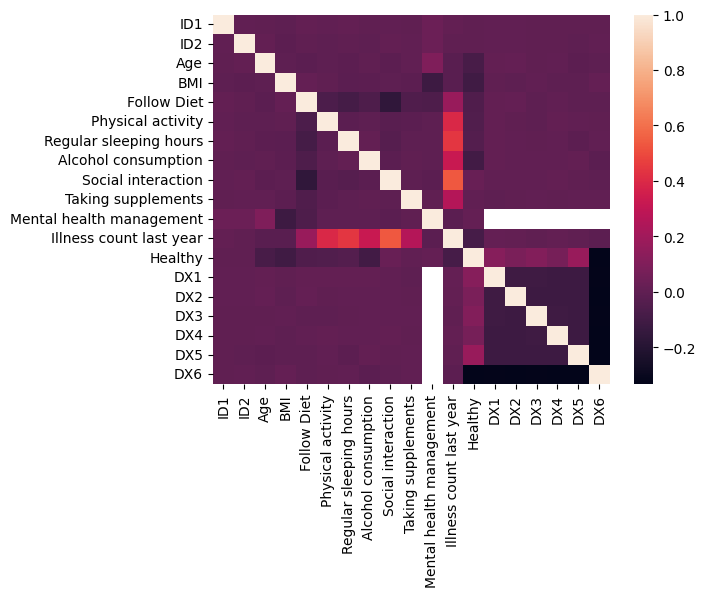

In [61]:
sns.heatmap(train_data.corr(numeric_only=True),)

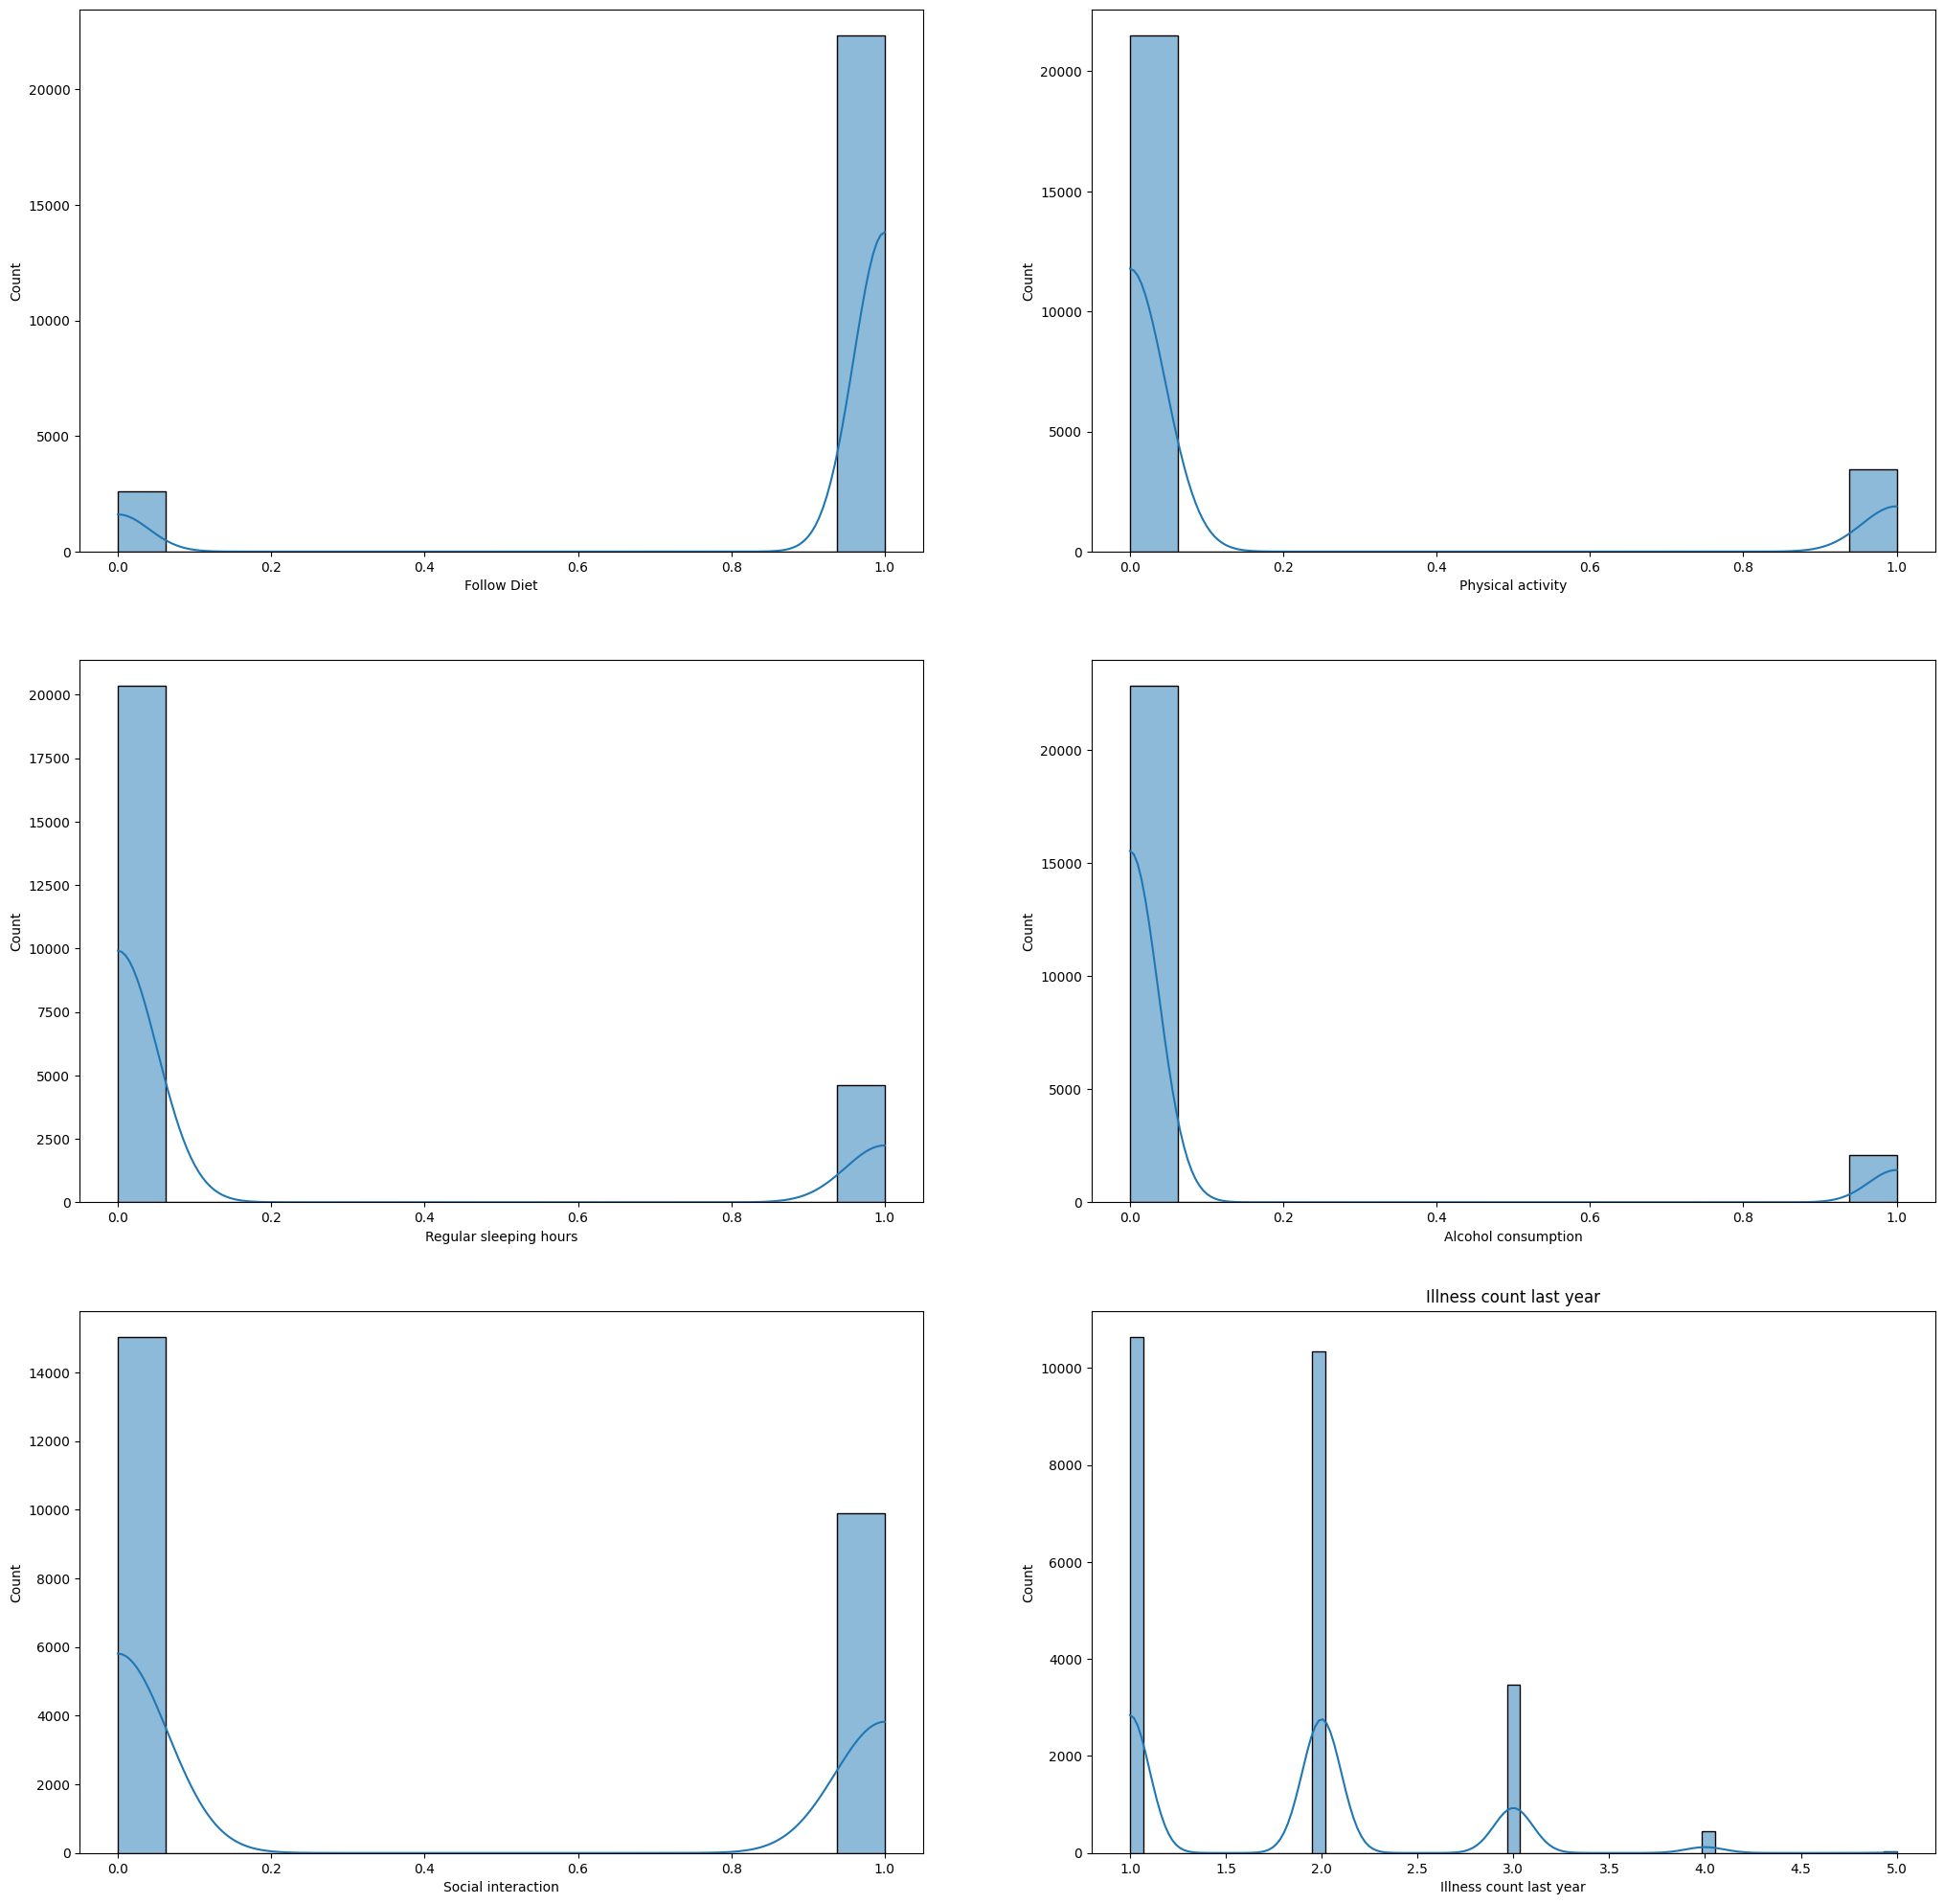

In [62]:
fig, axes = plt.subplots(3, 2, figsize=(25, 25))
count=0
df_train = train_data[['Follow Diet','Physical activity',
'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
'Illness count last year']]
for column in df_train:
    j = int(count/2)
    i = int(count % 2)
    count=count+1
    sns.histplot(df_train[column], kde=True, ax =axes[j,i])
    plt.title(column)

<Axes: xlabel='Healthy', ylabel='count'>

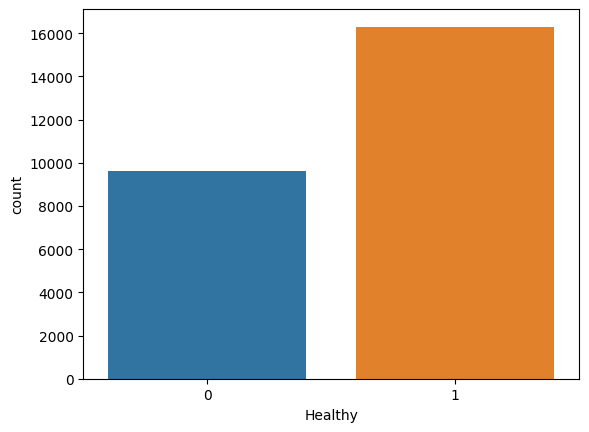

In [63]:
sns.countplot(x=train_data['Healthy'])

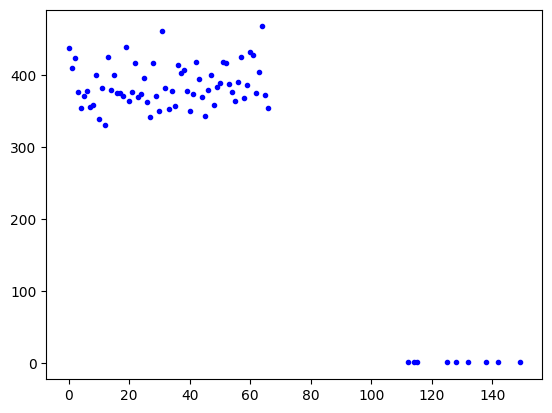

In [64]:
plt.plot(train_data["Age"].value_counts(), "b.")

**Dropping outliers**

In [65]:
value_counts = train_data["Age"].value_counts()  
to_keep = value_counts[value_counts >= 5].index  

train_data = train_data[train_data["Age"].isin(to_keep)]  

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25910 entries, 0 to 25919
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID1                        25910 non-null  int64   
 1   Specific ailments          25910 non-null  category
 2   ID2                        25910 non-null  int64   
 3   Age                        25910 non-null  int64   
 4   BMI                        25910 non-null  float64 
 5   Smoker?                    25910 non-null  object  
 6   Living in?                 25910 non-null  object  
 7   Any heriditary condition?  25910 non-null  object  
 8   Follow Diet                24937 non-null  float64 
 9   Physical activity          24937 non-null  float64 
 10  Regular sleeping hours     24937 non-null  float64 
 11  Alcohol consumption        24937 non-null  float64 
 12  Social interaction         24937 non-null  float64 
 13  Taking supplements         2493

**Dropping rows with nan values, entire rows are dropped as the ones with missing values have a lot of columns missing**

In [67]:
train_data = train_data[~train_data.isna().any(axis=1)]

**One Hot encoding**

In [68]:
encoder = OneHotEncoder()
enc_data = encoder.fit_transform(train_data[["Smoker?", "Living in?"]])
enc_data = pd.DataFrame(enc_data.toarray(), index = train_data.index)
train_data = train_data.join(enc_data)
train_data.drop(["Smoker?", "Living in?"], axis = 1, inplace = True)

**Scaling the data**

In [69]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[[ "Age", "BMI"]])
scaled_data = pd.DataFrame(scaled_data, index = train_data.index, columns= ["Age scaled", "BMI scaled"])
train_data = train_data.join(scaled_data)
train_data.drop(["Age", "BMI",], axis = 1, inplace= True)

In [70]:
train_data.drop(["Any heriditary condition?","ID1","ID2",], axis = 1, inplace = True)

**Splitting the target**

In [71]:
X_train_full = train_data.drop(["Healthy"], axis = 1)
y_train_full = train_data["Healthy"]

**Splitting the data into train and validation/dev set**

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, stratify= y_train_full, random_state= 40)

**Training a CatBoostClassifier**

In [ ]:
param_grid = [{
    'learning_rate' : [0.1,0.2,0.3,0.4],
    'max_depth': [2,3,4,5],
    'reg_lambda' : [3,4,5,6]
}]
cbc = GridSearchCV(cbc.CatBoostClassifier(eval_metric="Accuracy", cat_features=["Specific ailments"],iterations=500, random_state= 40), param_grid, cv = 3)
cbc.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model= True, plot = False)

**Preparing the test data**

In [74]:
test_data = pd.read_csv("Test_Data.csv")

In [75]:
test_data.drop(["ID1","ID2","Any heriditary condition?","Mental health management"],axis=1, inplace= True)

In [76]:
train_data["Specific ailments"] = train_data["Specific ailments"].astype("category")

In [77]:
arr = np.array(test_data['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

test_data = pd.concat([test_data,encoded_df],axis=1)

test_data.drop(columns=['Food preference'],axis =1 , inplace = True)

In [78]:
sum = test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].sum(axis=1)

In [79]:
test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]] = test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].div(sum, axis= 0)

In [80]:
test_data["Smoker?"] = np.where(test_data["Smoker?"] == 'Cannot say','YES',test_data["Smoker?"])

In [81]:
enc_data = encoder.transform(test_data[["Smoker?", "Living in?"]])
enc_data = pd.DataFrame(enc_data.toarray(), index = test_data.index)
test_data = test_data.join(enc_data)
test_data.drop(["Smoker?", "Living in?"], axis = 1, inplace = True)

In [82]:
scaled_data = scaler.transform(test_data[[ "Age", "BMI"]])
scaled_data = pd.DataFrame(scaled_data, index = test_data.index, columns= ["Age scaled", "BMI scaled"])
test_data = test_data.join(scaled_data)
test_data.drop(["Age", "BMI"], axis = 1, inplace= True)

**Getting our predictions and converting them into a csv format**

In [83]:
pred = cbc.predict(test_data)

In [84]:
sample = pd.read_csv("Sample_Submission.csv")

In [85]:
result = pd.DataFrame(pred, columns=['predictions'])

In [86]:
result.to_csv("submission_healthy_cbc.csv")